#Importaciones

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib as plt


In [ ]:
#Descargamos la data
(train_images,train_labels),(test_images, test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#6000 imagenes con dimension 28x28 pixeles
train_images.shape

(60000, 28, 28)

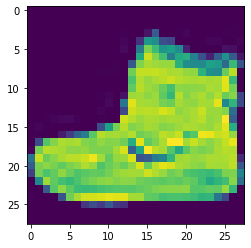

In [ ]:
plt.pyplot.imshow(train_images[0])

#Limpiar Data

los valores de los datos son de 60,000 imagenes en 28 x 28 en las celdas los valores son de 0 a 255 y los transforma a modo que sean decimales, el mayor llega a 1 porque asi maneja mejor el proceso

Luego en los labels, etiquetas, son 60,000 en ellas tienes valores de 0 a 9, por el tipo de ropa, y lo transforma para que sea asi, el numero 2 pasa a ser 0,0,1,0,0,0,0,0,0,0 el numero 5 para a ser 0,0,0,0,0,1,0,0,0,0


In [ ]:
#Limpiamos datos

#los pixeles que manejan las imagenes van de 1 a 255
#queremos estandarizar la data de 0 a 1 de manera decimal 
#ya que las ANN funcionan mejor con decimales
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [ ]:
#reshape a 6000, 28, 28, 1(1 canal de color, osea de negro a blanco, rgb = 3 canales)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
#Limpiamos data labels
# pasamos de un integro a una array ejemplo 5 to 0,0,0,0,1,0,0,0,0,0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

#MODELO DE DATOS

In [ ]:
#Creamos modelo base
model = tf.keras.Sequential()

#Capas convolucion
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu', input_shape=(28,28,1)))

#Capa pooling
model.add(MaxPooling2D(pool_size=2))

#Capa dropout para disminuir overfiting
model.add(Dropout(0.3))

#otra capa de convolucion pero sin decir el shape porque el shape sera el que le daran los datos de entrada
model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

#Aplana los datos en un array para ser los datos de entrada
model.add(Flatten())
  
#Capa densa de 256 inputs con relu
model.add(Dense(256,activation='relu'))

#Bajamos overfiting de nuevo
model.add(Dropout(0.5))

#salidas
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

#COMPILAR & ENTRENAR

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.fit(train_images,
          train_labels,
          batch_size=84,
          epochs=3
          ) 

Epoch 1/3
715/715 [==============================] - 15s 5ms/step - loss: 0.5857 - accuracy: 0.7856
Epoch 2/3
715/715 [==============================] - 4s 5ms/step - loss: 0.4057 - accuracy: 0.8557
Epoch 3/3
715/715 [==============================] - 4s 5ms/step - loss: 0.3654 - accuracy: 0.8708


[0.3124237656593323, 0.8896999955177307]

#Optimizacion

In [ ]:
#CallBacks

#este callback detiene el entrenamiento si no mejora
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3) 

#este callback guarda el modelo con los weigths y b con mejor accuracy en una archivo, se puede combiar con el early stoping
check_point=tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5', 
                                                verbose=1,
                                                monitor='accuracy',
                                                save_best_only=True)

model.fit(train_images,
          train_labels,
          batch_size=84,
          callbacks=[early], #
          epochs=3
          ) 

revisate batch normalization

pd: para añadir batch normalization a una capa
model.add(BatchNormalization())